#### Introduction: Exploratory Data Analysis of Loan Default Data

The goal of this notebook is to perform an initial **Exploratory Data Analysis (EDA)** on the provided loan portfolio dataset. This analysis is the first and most critical step in our MLOps project to predict loan defaults.

Our objectives are to:
* Understand the structure, data types, and statistical properties of the dataset.
* Identify any missing data or quality issues.
* Visualize the distributions of key features such as `fico_score` and `income`.
* Uncover initial patterns and relationships between customer attributes and the likelihood of a loan default.

The insights gained from this EDA will inform our data pre-processing strategy and guide the selection of features for our machine learning models.

#### Initial Setup

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Examine Data Structure and Types

In [2]:
# Load the dataset
df = pd.read_csv('../data/Loan_Data.csv')

In [3]:
# Display the first few rows
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
# Display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


**Data Structure and Sanity Check**

The `df.info()` method provides a quick and essential overview of the dataset. We can confirm that we have **10,000 entries** and **8 columns**. More importantly, it shows that there are **no missing values** (`10000 non-null` for every column), which significantly simplifies our data cleaning process. The data types (`Dtype`) are all numerical (`int64` or `float64`), indicating that we won't need to perform complex type conversions for these initial features.

In [5]:
# Generate descriptive statistics
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


**Statistical Summary**

The `df.describe()` output gives us a statistical summary of the numerical columns. Key observations include:
- **Default Rate**: The mean of the `default` column is `0.1851`, which means that approximately **18.5%** of the loans in this dataset have defaulted. This indicates a class imbalance that we'll need to be mindful of during modeling.
- **FICO Score**: The scores range from a low of `408` to a high of `850`, with a mean of around `638`. This is a typical range for FICO scores.
- **Income**: The income varies widely, from `$1,000` to over `$148,000`, with a mean of about `$70,000`.
- **Years Employed**: The `years_employed` ranges from 0 to 10, which seems reasonable.

#### 2. Check for Missing Values

In [6]:
# Check for missing values in each column
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

#### 3. Visualize Key Features

##### Distribution of the Target Variable

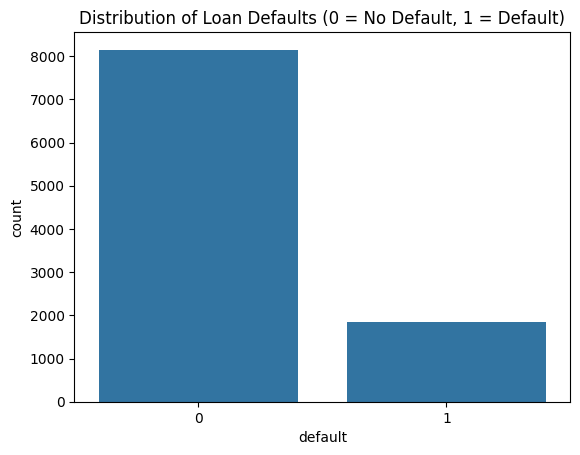

In [7]:
# Visualize the distribution of the 'default' column
sns.countplot(x='default', data=df)
plt.title('Distribution of Loan Defaults (0 = No Default, 1 = Default)')
plt.show()

**Target Variable Distribution (Default Status)**

This plot visualizes the distribution of our target variable, `default`. It clearly shows that the dataset is **imbalanced**. There are significantly more non-defaulting loans (`0`) than defaulting ones (`1`). This imbalance is a critical finding, as it can bias a machine learning model towards the majority class. We may need to use techniques like stratified sampling, over-sampling (e.g., SMOTE), or adjusting class weights during model training to handle this.

##### Distribution of Key Numerical Features

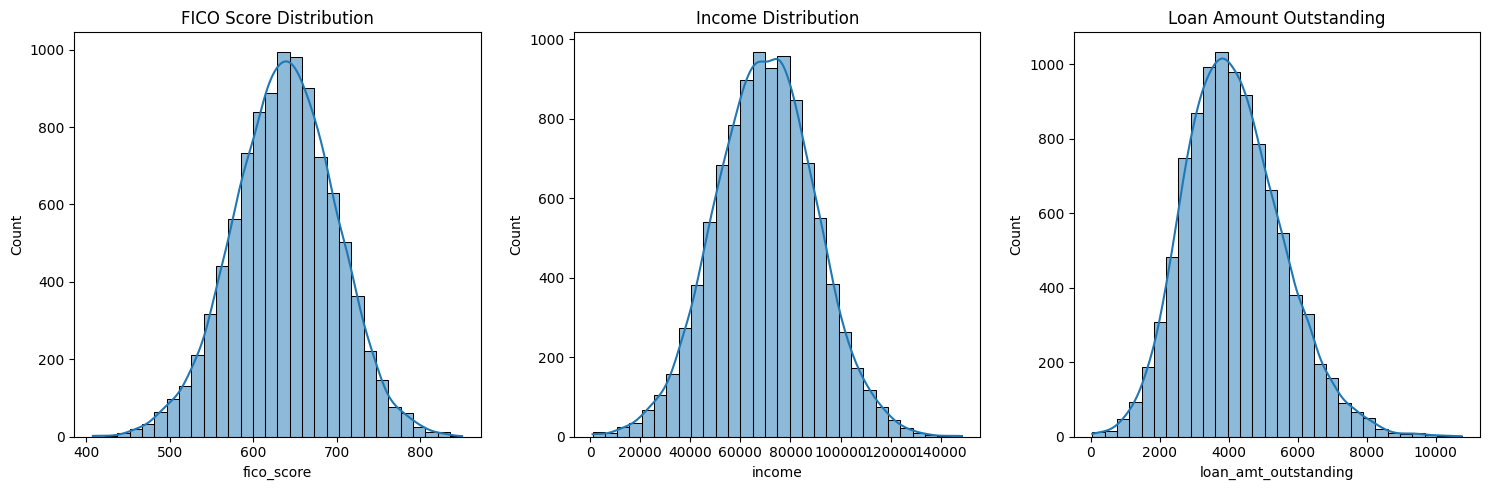

In [8]:
# Set up the figure for plotting
plt.figure(figsize=(15, 5))

# Plot FICO score distribution
plt.subplot(1, 3, 1)
sns.histplot(df['fico_score'], kde=True, bins=30)
plt.title('FICO Score Distribution')

# Plot income distribution
plt.subplot(1, 3, 2)
sns.histplot(df['income'], kde=True, bins=30)
plt.title('Income Distribution')

# Plot loan amount distribution
plt.subplot(1, 3, 3)
sns.histplot(df['loan_amt_outstanding'], kde=True, bins=30)
plt.title('Loan Amount Outstanding')

plt.tight_layout()
plt.show()

**Distribution of Key Predictors**

These histograms show the distributions for three potentially important predictive features:
- **FICO Score**: The distribution is approximately normal (a bell curve), centered around the 600-650 range.
- **Income**: The income distribution is also roughly normal, centered around the mean of $70,000.
- **Loan Amount Outstanding**: This feature follows a similar bell-shaped curve.

The normal distribution of these features is good, as many statistical models perform well with normally distributed data. There are no extreme skews that would require immediate transformation.

#### 4. Visualize Relationships Between All Features (Correlation)

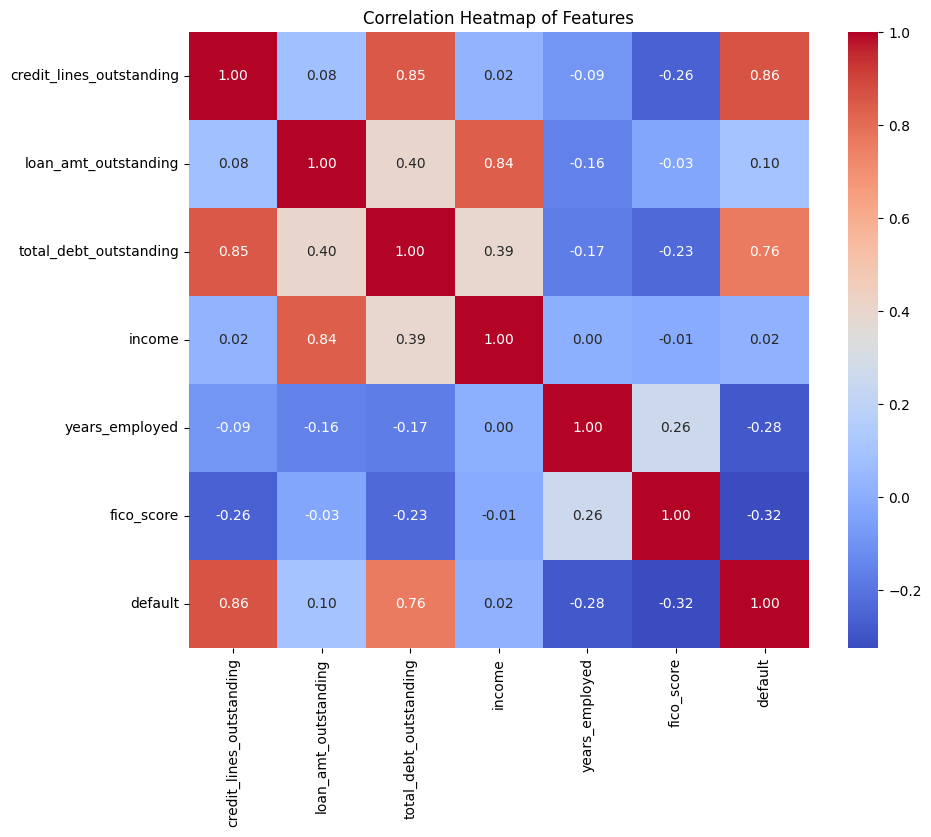

In [9]:
# Create a correlation matrix, dropping the non-predictive customer_id
# .corr() calculates the standard correlation coefficient between every pair of columns.
correlation_matrix = df.drop('customer_id', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
# annot=True writes the data value in each cell.
# cmap='coolwarm' is the color map to use.
# fmt='.2f' formats the numbers to two decimal places.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Features')
plt.show()

**Correlation Analysis**

The correlation heatmap reveals the linear relationships between our features. Key insights include:
- **Strongest Predictor**: The `default` column has the strongest negative correlation with `fico_score` **(-0.32)**. This confirms our hypothesis that as the FICO score goes up, the likelihood of default goes down.
- **Other Predictors**: `years_employed` also has a moderate negative correlation with default **(-0.28)**. `credit_lines_outstanding` has a slight positive correlation **(0.10)** with default.
- **Multicollinearity**: There are strong positive correlations between some features, such as `total_debt_outstanding` and `credit_lines_outstanding` **(0.85)**, and `income` and `loan_amt_outstanding` **(0.84)**. This multicollinearity might be something to consider during feature selection, as highly correlated features can sometimes make model interpretation more difficult.

#### 4. Analyze Relationships with the Target Variable

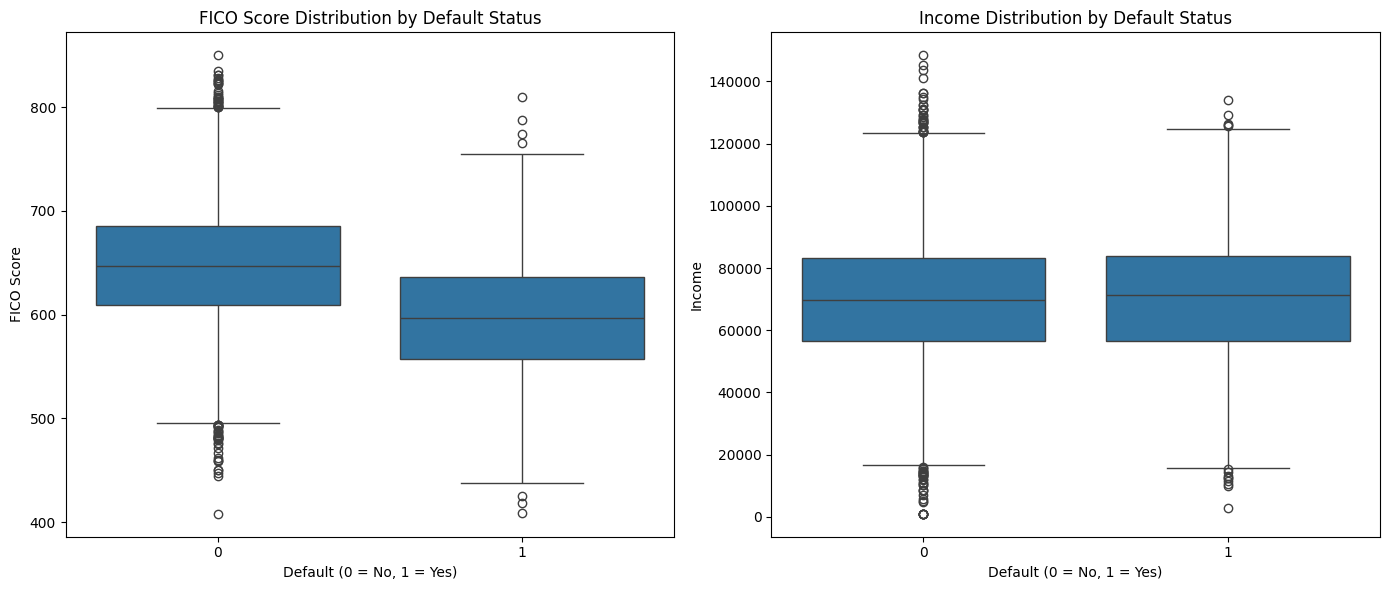

In [10]:
# Set up the figure for plotting two charts side-by-side
plt.figure(figsize=(14, 6))

# Subplot 1: FICO Score vs. Default
# This box plot compares the distribution of FICO scores for customers who defaulted vs. those who did not.
plt.subplot(1, 2, 1)
sns.boxplot(x='default', y='fico_score', data=df)
plt.title('FICO Score Distribution by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('FICO Score')

# Subplot 2: Income vs. Default
# This compares the income distribution for the two default categories.
plt.subplot(1, 2, 2)
sns.boxplot(x='default', y='income', data=df)
plt.title('Income Distribution by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Income')

# Display the plots
plt.tight_layout()
plt.show()

**Feature Comparison by Default Status**

These box plots provide a clear comparison of feature distributions between the two target classes (`default=0` and `default=1`).
- **FICO Score**: The plot on the left starkly illustrates that the entire distribution of FICO scores for customers who defaulted (`1`) is significantly lower than for those who did not (`0`). The median FICO score for defaulters is around 600, while for non-defaulters, it's closer to 650. This is strong evidence that FICO score will be a very important feature for our predictive model.
- **Income**: The plot on the right shows that the median income for customers who defaulted is slightly lower than for those who did not, but the difference is much less pronounced compared to the FICO score. While income is likely a useful feature, it may not be as powerful a predictor as the FICO score.

#### Conclusion & Next Steps

This exploratory data analysis has provided several key insights that will direct the next phase of our project:

* **Data Quality is High**: The dataset is complete, with **no missing values**, and all features are in a numerical format. This will simplify our pre-processing pipeline.
* **The Target is Imbalanced**: Approximately **18.5% of the loans in this dataset have defaulted**. This class imbalance is significant and must be addressed in the modeling phase, possibly through techniques like stratified sampling or by using models that can handle imbalanced data.
* **Key Predictors Identified**: The analysis confirms that `fico_score` is the strongest individual predictor, showing a clear negative correlation with default **(-0.32)**. The `years_employed` feature also shows a moderate negative correlation **(-0.28)**. These features will be central to our predictive models.

Based on these findings, the next steps will focus on **Model Engineering**. We will proceed to build, train, and evaluate at least three different classification algorithms, paying close attention to how each model performs given the imbalanced nature of our target variable. All experiments will be tracked using MLflow to ensure reproducibility and facilitate model comparison.